In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, measure
from pathlib import Path


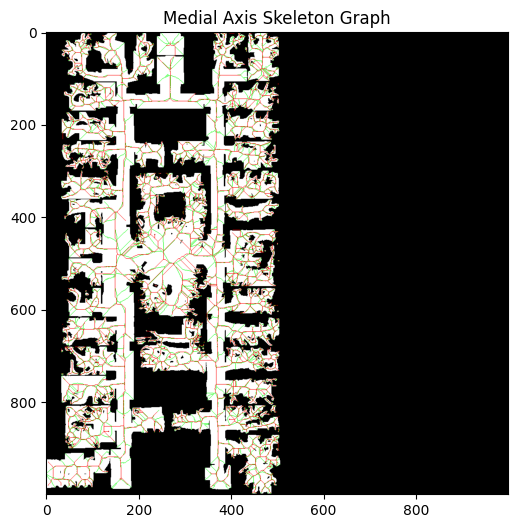

In [10]:
map_path = Path("2D_maps/Area_1_floor_projection.png")
# Load binary image (occupied=1, free=0)
img = io.imread(map_path, as_gray=True)
occ = img < 0.5  # assume white=obstacle
free = ~occ

# Compute medial axis skeleton
vorn = morphology.medial_axis(free)

skeleton = morphology.skeletonize(free)

# add voronoi to img in green
img = np.stack([img, img, img], axis=-1)  # make 3-channel
img[vorn] = [0, 1, 0]  # green for voronoi
img[skeleton] = [1, 0, 0]  # red for skeleton

# Plot
plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")
plt.title("Medial Axis Skeleton Graph")
plt.show()
